In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [2]:
np.random.seed(613)
x1 = np.arange(50) #0 to 49
y1 = np.random.randint(0, 75,50) #y1 as random integers; 0 to 75 with 50 numbers
x2 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"]) #list of string with names
y2 = np.array([110, 180, 240, 99, 220]) #y2 as array

# 2 sets of data
# set 2 array has more options for operations/packages

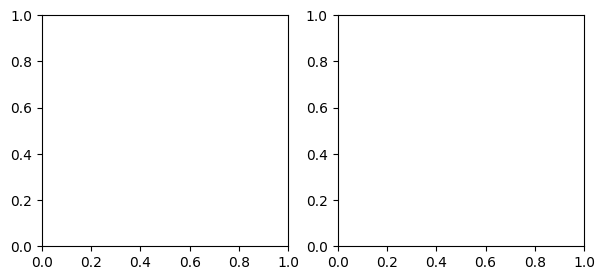

In [3]:
'''
for one graph would do:
fig, ax = plt.subplots(figsize=(5, 3))
'''
#defining two graphs at once
fig,(ax1, ax2) = plt.subplots(ncols=2,
                              nrows=1,
                              figsize=(7, 3))

<BarContainer object of 5 artists>

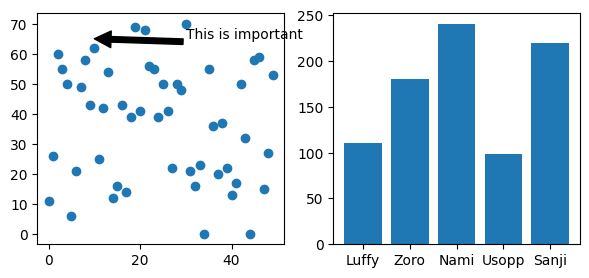

In [4]:
fig,(ax1, ax2) = plt.subplots(ncols=2,
                              nrows=1,
                              figsize=(7, 3))

ax1.scatter(x1,y1) #scatter for 1
ax1.annotate('This is important',xy=(10,65),xytext=(30,65),arrowprops=dict(facecolor='black'))
ax2.bar(x2,y2) #bar for 2

#if you don't specify ax1,ax2 - acn do ax[0] and ax[1] but easier to specify

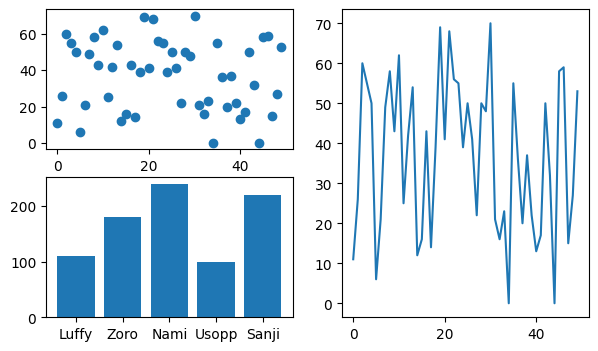

In [5]:
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'], #ax1 in upper left
                                    ['ax2', 'ax3']], #ax2 in lower left
                                    figsize=(7, 4)) #this is just to set up the plot parameters, nothing to do with the actual data yet

#this is for the data - specifying which dataset goes in which plot
someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)

Text(0.5, 0, 'Label 2: 2 Fast 2 Furious')

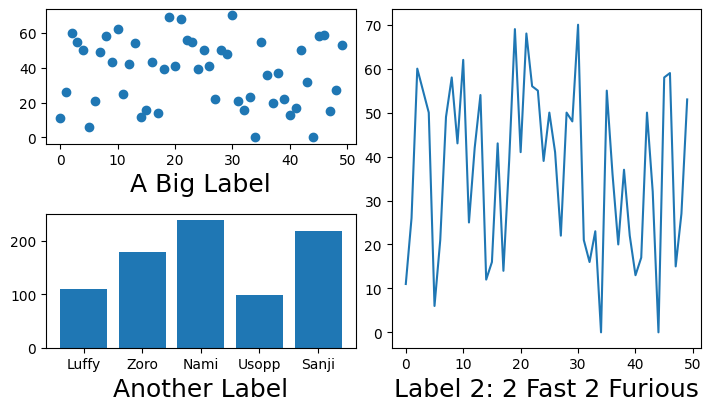

In [6]:
#Modify figure layout

fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                    ['ax2', 'ax3']],
                                    figsize=(7, 4),
                                    layout='constrained') # automatically fix the spacing
someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax1"].set_xlabel('A Big Label',fontsize=18)
someaxes["ax2"].set_xlabel('Another Label',fontsize=18)
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious',fontsize=18 )
#fig.tight_layout() #or adjust the spacing it through here

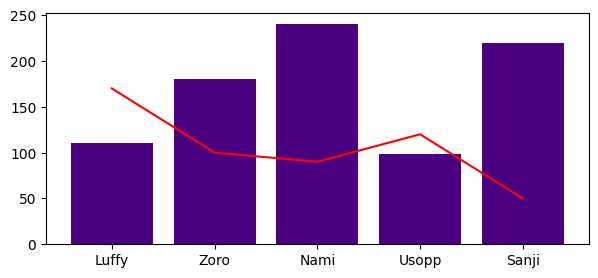

In [7]:
#Multiple viz on one axes object

# first make our sample data
x = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])
y2 = np.array([170, 100, 90, 120, 50])

# define our figure and axes (just one this time)
fig, ax = plt.subplots(figsize=(7, 3))

# now call both bar and plot elements to the same axes (ax)
ax.bar(x, y1,
color = "indigo")
ax.plot(x, y2,
color = "red")

<ErrorbarContainer object of 3 artists>

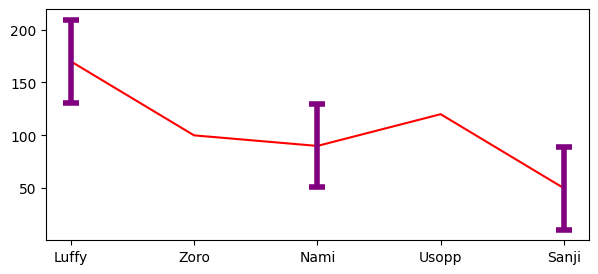

In [8]:
#calculate SD
y2_sd = np.std(y2)
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")

#add error bar - includes the ability to automatically plot the data points
ax.errorbar(x, #x values
            y2, #y values
            yerr = y2_sd, #the SD
            color='blue', #of the error bars AND line if fmt=none not specified
            fmt = "none",#only none removes the main data line, anything else overlaps with the ax.plot(x,y2,color=red)
            ecolor='purple',
            elinewidth=4,
            capsize=6,
            capthick=4,
            errorevery=2)


In [9]:
#add image to plot
from PIL import Image # to open images
import requests # to get images from URLs
from io import BytesIO # to store images

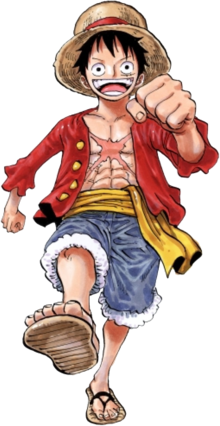

In [10]:
# get image form internet
url = "https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png"

#to bypass any request blocks
headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept": "image/*,*/*;q=0.8",
    "Referer": "https://en.wikipedia.org/"
}

response=requests.get(url,headers=headers) #to request the image
image_file=BytesIO(response.content) # to download the image
image=Image.open(image_file) #to open the image
image

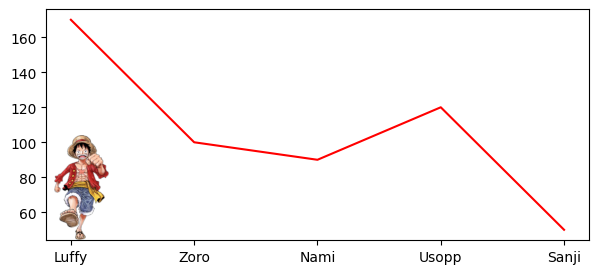

In [11]:
#adding an image to the plot

#set the data
x=np.array(['Luffy','Zoro','Nami','Usopp','Sanji'])
y1=np.array([110,180,240,99,220])
y2=np.array([170,100,90,120,50])

#set the full plot parameters
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")
ax_image = fig.add_axes([0.1, 0.11, 0.15, 0.35]) #set the image plot parameters

#add image to the image plot area
ax_image.imshow(image)
ax_image.axis('off')

#saving the visualization
path = 'D:/visualization/02_activities/assignments/participation' # can be full path or relative path
filename = '/fig1a.png'
plt.savefig(path+filename, dpi=300) # note that path shouldn't end with / since filename starts with 